### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="understanding_data">Understanding the Data</h2>

### `laptopInfoDB.csv`:

This data base created by **`laptopExtractor.py`** from digikala's on site datas

*   **MODEL** e.g. لپ تاپ 15.6 اینچی ایسوس مدل ROG Strix G15 G513RW-HQ222-R7 6800H 16GB 1SSD RTX3070Ti
*   **CPU** e.g. Ryzen 7
*   **MEMORY** e.g. 16
*   **STORAGE** e.g. 1024
*   **GPU** e.g. NVIDIA
*   **DISPLAY** e.g 2560x1440
*   **URL** e.g. https://www.digikala.com/product/...
*   **PRICE** e.g. 64999000


<h2 id="reading_data">Reading the data in</h2>


In [2]:
df = pd.read_csv("laptopInfoDB.csv")

# take a look at the dataset
df.head()

,model,cpu,memory,storage,gpu,display,url,price
0,لپ تاپ 15.6 اینچی اچ‌پی مدل Victus 15 FA1093DX...,Core i5,32,1024,NVIDIA,1920x1080,https://www.digikala.com/product/dkp-11643491/...,45000000
1,لپ تاپ 15.6 اینچی ایسوس مدل ROG Strix G15 G513...,Ryzen 7,16,1024,NVIDIA,2560x1440,https://www.digikala.com/product/dkp-13259089/...,64999000
2,لپ تاپ 15.6 اینچی لنوو مدل LOQ 15IRH8-i5 8GB 1...,Core i5,8,1024,NVIDIA,1920x1080,https://www.digikala.com/product/dkp-13190285/...,39911000
3,لپ تاپ 15.6 اینچی اچ پی مدل FB1013DX-15- R5 16...,Ryzen 5,16,512,NVIDIA,1920x1080,https://www.digikala.com/product/dkp-13414397/...,33470000
4,لپ تاپ 15.6 اینچی لنوو مدل IdeaPad 3 15IAU7-i3...,Core i3,4,256,Intel,1920x1080,https://www.digikala.com/product/dkp-10192773/...,15790000


Let's select some features that we want to use for regression.


In [3]:
cdf = df[['cpu','memory','storage','gpu','display','price']]

cdf.head(9)

,cpu,memory,storage,gpu,display,price
0,Core i5,32,1024,NVIDIA,1920x1080,45000000
1,Ryzen 7,16,1024,NVIDIA,2560x1440,64999000
2,Core i5,8,1024,NVIDIA,1920x1080,39911000
3,Ryzen 5,16,512,NVIDIA,1920x1080,33470000
4,Core i3,4,256,Intel,1920x1080,15790000
5,Core i5,16,1024,Intel,1920x1200,29000000
6,Core i7,16,512,NVIDIA,1920x1080,39900000
7,Core i7,16,1024,NVIDIA,2880x1620,55349000
8,Core i7,16,512,NVIDIA,1920x1200,68800000


Let's prepare data for regression


In [4]:
DUMMIES_VARIABLES = ['cpu', 'gpu']
cdf = pd.get_dummies(cdf, columns=DUMMIES_VARIABLES, dtype=int)

cdf.head(9)

,memory,storage,display,price,cpu_Celeron,cpu_Core i3,cpu_Core i5,cpu_Core i7,cpu_M2,cpu_Ryzen 5,cpu_Ryzen 7,gpu_Apple,gpu_Intel,gpu_NVIDIA
0,32,1024,1920x1080,45000000,0,0,1,0,0,0,0,0,0,1
1,16,1024,2560x1440,64999000,0,0,0,0,0,0,1,0,0,1
2,8,1024,1920x1080,39911000,0,0,1,0,0,0,0,0,0,1
3,16,512,1920x1080,33470000,0,0,0,0,0,1,0,0,0,1
4,4,256,1920x1080,15790000,0,1,0,0,0,0,0,0,1,0
5,16,1024,1920x1200,29000000,0,0,1,0,0,0,0,0,1,0
6,16,512,1920x1080,39900000,0,0,0,1,0,0,0,0,0,1
7,16,1024,2880x1620,55349000,0,0,0,1,0,0,0,0,0,1
8,16,512,1920x1200,68800000,0,0,0,1,0,0,0,0,0,1


In [5]:
cdf[['display_length', 'display_width']] = cdf['display'].str.split('x', expand=True)

cdf['display_length'] = pd.to_numeric(cdf['display_length'])
cdf['display_width'] = pd.to_numeric(cdf['display_width'])

cdf.head(9)

,memory,storage,display,price,cpu_Celeron,cpu_Core i3,cpu_Core i5,cpu_Core i7,cpu_M2,cpu_Ryzen 5,cpu_Ryzen 7,gpu_Apple,gpu_Intel,gpu_NVIDIA,display_length,display_width
0,32,1024,1920x1080,45000000,0,0,1,0,0,0,0,0,0,1,1920,1080
1,16,1024,2560x1440,64999000,0,0,0,0,0,0,1,0,0,1,2560,1440
2,8,1024,1920x1080,39911000,0,0,1,0,0,0,0,0,0,1,1920,1080
3,16,512,1920x1080,33470000,0,0,0,0,0,1,0,0,0,1,1920,1080
4,4,256,1920x1080,15790000,0,1,0,0,0,0,0,0,1,0,1920,1080
5,16,1024,1920x1200,29000000,0,0,1,0,0,0,0,0,1,0,1920,1200
6,16,512,1920x1080,39900000,0,0,0,1,0,0,0,0,0,1,1920,1080
7,16,1024,2880x1620,55349000,0,0,0,1,0,0,0,0,0,1,2880,1620
8,16,512,1920x1200,68800000,0,0,0,1,0,0,0,0,0,1,1920,1200


Let's plot Emission values with respect to Memory:


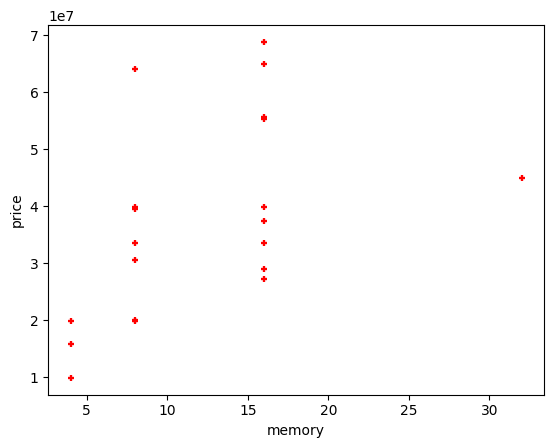

In [6]:
plt.scatter(cdf.memory, cdf.price, s=20, c='red', marker='+')
plt.xlabel("memory")
plt.ylabel("price")
plt.show()

#### Creating train and test dataset


In [7]:
msk = np.random.rand(len(df)) < 0.8
print(msk)
train = cdf[msk]
test = cdf[~msk]

[ True False False False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False False  True  True  True False  True  True  True False False  True
  True  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True  True False  True  True  True  True
  True  True  True  True  True False  True]


#### Train data distribution


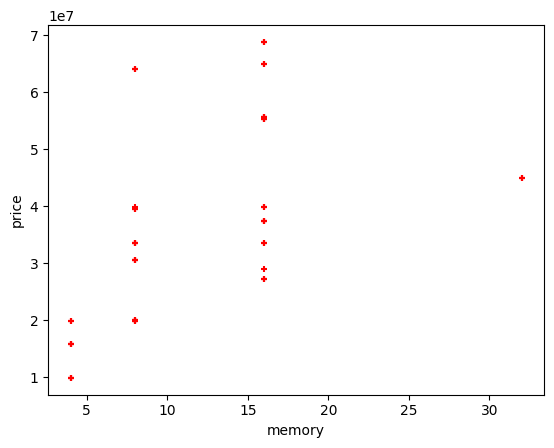

In [8]:
plt.scatter(train.memory, train.price, s=20, c='red', marker='+')
plt.xlabel("memory")
plt.ylabel("price")
plt.show()

In [9]:
plt.scatter(test.memory, test.price, s=20, c='red', marker='+')
plt.xlabel("memory")
plt.ylabel("price")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, price of laptop depend of its CPU , MEMORY , STORAGE , GPU and its DISPLAY
So we create a Multiple Regression Model from that data to guess price of laptop with that information

In [ ]:
cdf.head(20)

,memory,storage,display,price,cpu_Celeron,cpu_Core i3,cpu_Core i5,cpu_Core i7,cpu_M2,cpu_Ryzen 5,cpu_Ryzen 7,gpu_Apple,gpu_Intel,gpu_NVIDIA,display_length,display_width
0,32,1024,1920x1080,45000000,0,0,1,0,0,0,0,0,0,1,1920,1080
1,16,1024,2560x1440,64999000,0,0,0,0,0,0,1,0,0,1,2560,1440
2,8,1024,1920x1080,39911000,0,0,1,0,0,0,0,0,0,1,1920,1080
3,16,512,1920x1080,33470000,0,0,0,0,0,1,0,0,0,1,1920,1080
4,4,256,1920x1080,15790000,0,1,0,0,0,0,0,0,1,0,1920,1080
5,16,1024,1920x1200,29000000,0,0,1,0,0,0,0,0,1,0,1920,1200
6,16,512,1920x1080,39900000,0,0,0,1,0,0,0,0,0,1,1920,1080
7,16,1024,2880x1620,55349000,0,0,0,1,0,0,0,0,0,1,2880,1620
8,16,512,1920x1200,68800000,0,0,0,1,0,0,0,0,0,1,1920,1200
9,8,512,1920x1200,30500000,0,0,0,1,0,0,0,0,1,0,1920,1200


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['memory','storage','cpu_Celeron','cpu_Core i3','cpu_Core i5','cpu_Core i7','cpu_M2','cpu_Ryzen 5','cpu_Ryzen 7','gpu_Apple','gpu_Intel','gpu_NVIDIA','display_length','display_width']])
y = np.asanyarray(train[['price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 5.18777286e+05 -2.91912774e+03 -2.36781245e+06 -9.45220169e+06
  -3.03765845e+06  2.04665713e+06  2.98830092e+06 -8.04572445e+06
   1.78684390e+07  2.98830092e+06 -1.02851425e+07  7.29684158e+06
  -3.95868456e+04  9.01250309e+04]]


<h2 id="prediction">Prediction</h2>


In [ ]:
y_hat= regr.predict(test[['memory','storage','cpu_Celeron','cpu_Core i3','cpu_Core i5','cpu_Core i7','cpu_M2','cpu_Ryzen 5','cpu_Ryzen 7','gpu_Apple','gpu_Intel','gpu_NVIDIA','display_length','display_width']])
x = np.asanyarray(test[['memory','storage','cpu_Celeron','cpu_Core i3','cpu_Core i5','cpu_Core i7','cpu_M2','cpu_Ryzen 5','cpu_Ryzen 7','gpu_Apple','gpu_Intel','gpu_NVIDIA','display_length','display_width']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 44412358217230.57
Variance score: 0.86


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### get input

In [ ]:
# memory
memory = int(input('what is your memory(GB) : '))

# storage
storage = int(input('what is your storage(GB) : '))

# cpu
cpu = input('what is your cpu name : < \'Celeron\' , \'Core i3\' , \'Core i5\' , \'Core i7\' , \'M2\' , \'Ryzen 5\' , \'Ryzen 7\' > ')
if cpu == 'Celeron':
    cpu_Celeron = 1
    cpu_Core_i3 = 0
    cpu_Core_i5 = 0
    cpu_Core_i7 = 0
    cpu_M2 = 0
    cpu_Ryzen_5 = 0
    cpu_Ryzen_7 = 0
elif cpu == 'Core i3':
    cpu_Celeron = 0
    cpu_Core_i3 = 1
    cpu_Core_i5 = 0
    cpu_Core_i7 = 0
    cpu_M2 = 0
    cpu_Ryzen_5 = 0
    cpu_Ryzen_7 = 0
elif cpu == 'Core i5':
    cpu_Celeron = 0
    cpu_Core_i3 = 0
    cpu_Core_i5 = 1
    cpu_Core_i7 = 0
    cpu_M2 = 0
    cpu_Ryzen_5 = 0
    cpu_Ryzen_7 = 0
elif cpu == 'Core i7':
    cpu_Celeron = 0
    cpu_Core_i3 = 0
    cpu_Core_i5 = 0
    cpu_Core_i7 = 1
    cpu_M2 = 0
    cpu_Ryzen_5 = 0
    cpu_Ryzen_7 = 0
elif cpu == 'M2':
    cpu_Celeron = 0
    cpu_Core_i3 = 0
    cpu_Core_i5 = 0
    cpu_Core_i7 = 0
    cpu_M2 = 1
    cpu_Ryzen_5 = 0
    cpu_Ryzen_7 = 0
elif cpu == 'Ryzen 5':
    cpu_Celeron = 0
    cpu_Core_i3 = 0
    cpu_Core_i5 = 0
    cpu_Core_i7 = 0
    cpu_M2 = 0
    cpu_Ryzen_5 = 1
    cpu_Ryzen_7 = 0
elif cpu == 'Ryzen 7':
    cpu_Celeron = 0
    cpu_Core_i3 = 0
    cpu_Core_i5 = 0
    cpu_Core_i7 = 0
    cpu_M2 = 0
    cpu_Ryzen_5 = 0
    cpu_Ryzen_7 = 1

# gpu
gpu = input('what is your gpu name : < \'Apple\' , \'Intel\' , \'NVIDIA\' > ')
if gpu == 'Apple':
    gpu_Apple=1
    gpu_Intel=0
    gpu_NVIDIA=0
elif gpu == 'Intel':
    gpu_Apple=0
    gpu_Intel=1
    gpu_NVIDIA=0
elif gpu == 'NVIDIA':
    gpu_Apple=0
    gpu_Intel=0
    gpu_NVIDIA=1
    
#display
display_length = int(input('what is your display length ex.1920 :'))
display_width = int(input('what is your display width ex.1080 :'))

input_data = { 
    'memory': [memory],
    'storage': [storage],
    'cpu_Celeron': [cpu_Celeron],
    'cpu_Core i3': [cpu_Core_i3],
    'cpu_Core i5': [cpu_Core_i5],
    'cpu_Core i7': [cpu_Core_i7],
    'cpu_M2': [cpu_M2],
    'cpu_Ryzen 5': [cpu_Ryzen_5],
    'cpu_Ryzen 7': [cpu_Ryzen_7],
    'gpu_Apple': [gpu_Apple],
    'gpu_Intel': [gpu_Intel],
    'gpu_NVIDIA': [gpu_NVIDIA],
    'display_length': [display_length],
    'display_width': [display_width]
    
}

input_df = pd.DataFrame(input_data)
print(f'>>> the price for this setup \'memory:{memory}GB storage:{storage}GB cpu:{cpu} gpu:{gpu} display:{display_length}x{display_width}\' is : ')



price = regr.predict(input_df[['memory','storage','cpu_Celeron','cpu_Core i3','cpu_Core i5','cpu_Core i7','cpu_M2','cpu_Ryzen 5','cpu_Ryzen 7','gpu_Apple','gpu_Intel','gpu_NVIDIA','display_length','display_width']])
print('>>> price: ' , price)

>>> the price for this setup 'memory:32GB storage:512GB cpu:Core i7 gpu:Intel display:1920x1080' is : 
>>> price:  [[34280834.09036104]]


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
